In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# **8:2**

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("Eth.csv")
df1 = df.reset_index()['Close']
df1

0        136.443619
1        134.206955
2        132.249420
3        127.774124
4        137.822388
           ...     
1915    3840.256348
1916    3763.196533
1917    3746.849609
1918    3760.026611
1919    3813.198975
Name: Close, Length: 1920, dtype: float64

In [3]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (1536, 1)
Test shape: (384, 1)


In [5]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 35ms/step - loss: 0.0530 - val_loss: 0.0025
Epoch 2/100
23/23 [==============================] - 1s 25ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 1s 25ms/step - loss: 0.0012 - val_loss: 9.6049e-04
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0011 - val_loss: 9.6031e-04
Epoch 8/100
23/23 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 8.9401e-04
Epoch 9/100
23/23 [==============================] - 0s 22ms/step - loss: 9.8851e-04 - val_loss: 8.8040e-04
Epoch 10/100
23/23 [==============================] - 1s 23ms/step - loss: 9.356

In [10]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)


9/9 [==============================] - 0s 7ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [12]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)


test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 87.18048929766388
Testing MAPE: 2.1421939303858086
Testing MAE: 57.09979226479739


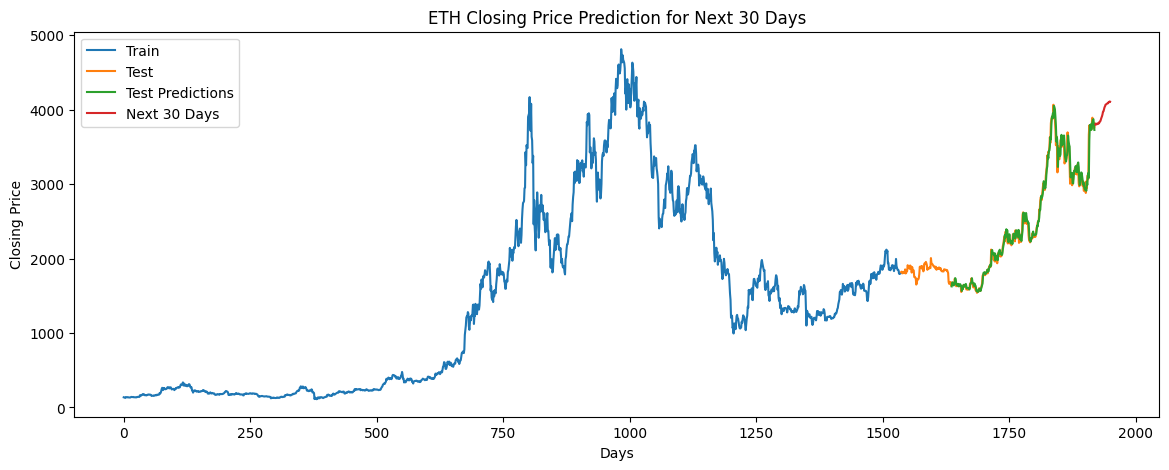

Predicted closing prices for the next 30 days:
[3802.0984 3811.4895 3802.1445 3803.7522 3814.717  3812.7317 3810.3777
 3827.1968 3826.6257 3843.0085 3847.9072 3872.708  3893.6377 3911.144
 3936.7856 3973.2368 3977.5574 4005.2595 4032.0598 4045.4534 4067.1448
 4071.3748 4075.088  4082.147  4085.5183 4086.1484 4101.0654 4101.193
 4109.8843 4107.36  ]


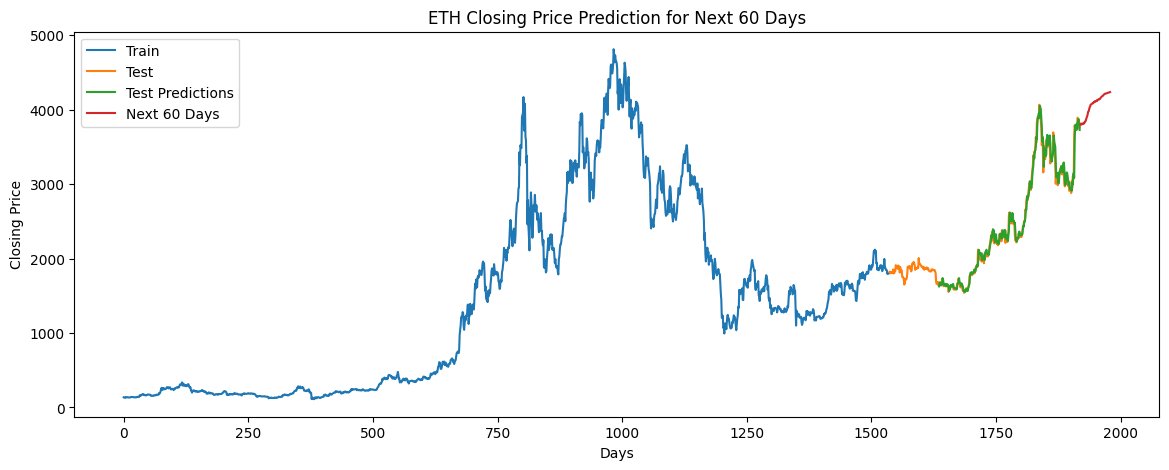

Predicted closing prices for the next 60 days:
[3802.0984 3811.4895 3802.1445 3803.7522 3814.717  3812.7317 3810.3777
 3827.1968 3826.6257 3843.0085 3847.9072 3872.708  3893.6377 3911.144
 3936.7856 3973.2368 3977.5574 4005.2595 4032.0598 4045.4534 4067.1448
 4071.3748 4075.088  4082.147  4085.5183 4086.1484 4101.0654 4101.193
 4109.8843 4107.36   4116.194  4113.791  4123.0103 4118.52   4130.5146
 4135.14   4139.769  4137.153  4144.165  4145.3247 4158.111  4167.2407
 4175.723  4179.244  4184.034  4190.5366 4200.2593 4205.5117 4208.5747
 4215.2505 4216.4043 4218.448  4219.2515 4223.377  4224.258  4228.181
 4229.732  4232.412  4231.582  4236.2095]


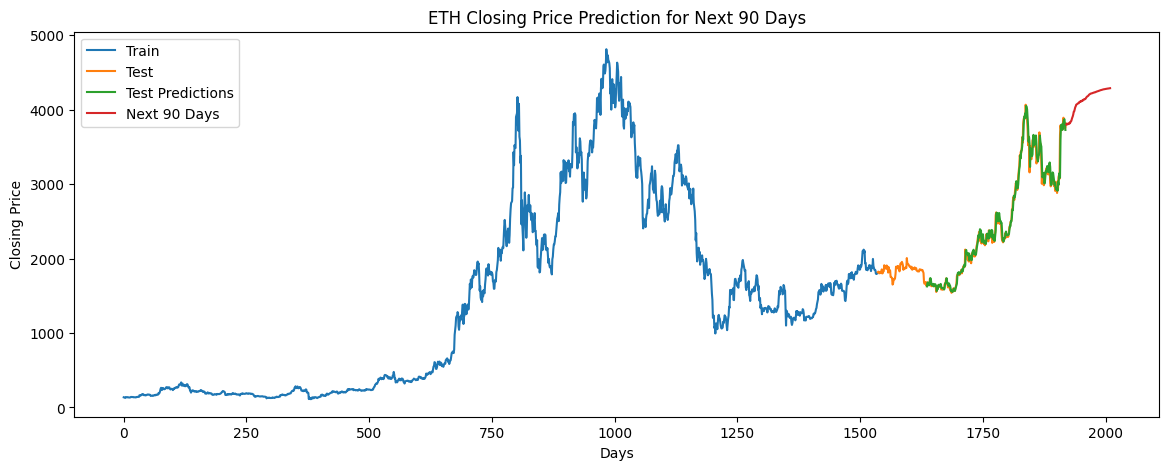

Predicted closing prices for the next 90 days:
[3802.0984 3811.4895 3802.1445 3803.7522 3814.717  3812.7317 3810.3777
 3827.1968 3826.6257 3843.0085 3847.9072 3872.708  3893.6377 3911.144
 3936.7856 3973.2368 3977.5574 4005.2595 4032.0598 4045.4534 4067.1448
 4071.3748 4075.088  4082.147  4085.5183 4086.1484 4101.0654 4101.193
 4109.8843 4107.36   4116.194  4113.791  4123.0103 4118.52   4130.5146
 4135.14   4139.769  4137.153  4144.165  4145.3247 4158.111  4167.2407
 4175.723  4179.244  4184.034  4190.5366 4200.2593 4205.5117 4208.5747
 4215.2505 4216.4043 4218.448  4219.2515 4223.377  4224.258  4228.181
 4229.732  4232.412  4231.582  4236.2095 4237.377  4242.0938 4243.5264
 4246.222  4247.7847 4251.033  4251.8174 4255.6226 4257.6216 4260.4272
 4262.627  4264.098  4265.5425 4268.3535 4269.9272 4272.0093 4273.9214
 4274.361  4276.046  4277.1787 4278.64   4279.532  4281.2393 4281.8496
 4283.6025 4284.0054 4285.328  4286.128  4287.7427 4288.528 ]


In [13]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **7:3**

In [14]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("Eth.csv")
df1 = df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [15]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (1344, 1)
Test shape: (576, 1)


In [17]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 44ms/step - loss: 0.0463 - val_loss: 0.0055
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 3/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 0s 24ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 9.5989e-04
Epoch 7/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0017 - val_loss: 8.7453e-04
Epoch 8/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
20/20 [==============================] - 1s 25ms/step - loss: 0.0016 - val_loss: 7.9589e-04
Epoch 10/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0014 - val_

In [22]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 9ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )

In [24]:
# 12. Đánh giá độ chính xác thuật toán

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 74.33449773409849
Testing MAPE: 2.1013236456653743
Testing MAE: 48.699945004112166


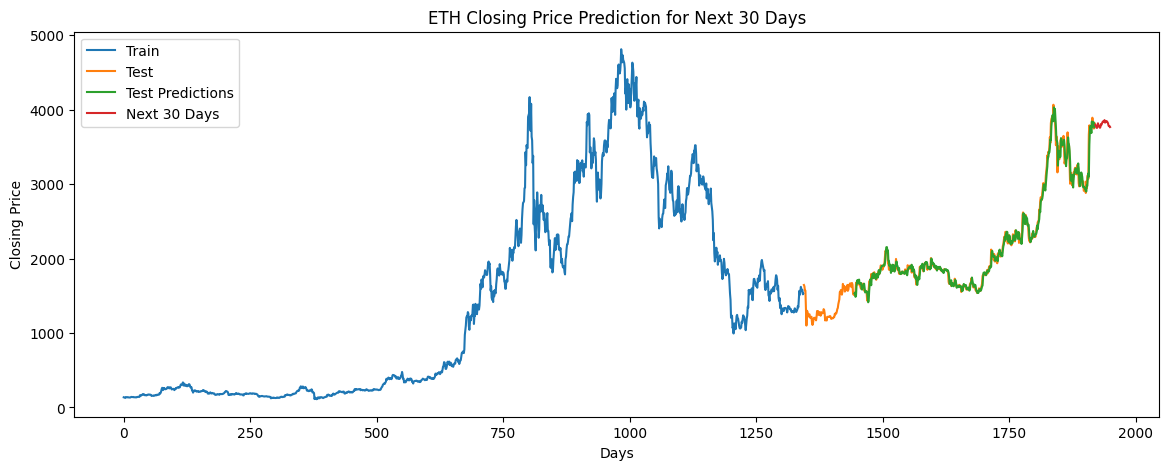

Predicted closing prices for the next 30 days:
[3795.1516 3781.9978 3767.5168 3754.1797 3772.6719 3817.5747 3794.3528
 3781.2039 3766.9124 3756.616  3770.3684 3805.273  3797.5876 3816.055
 3832.8037 3840.5845 3846.948  3839.1072 3859.9949 3826.318  3832.3577
 3840.388  3847.823  3839.5186 3830.0227 3815.1147 3785.3855 3777.7124
 3778.7402 3767.192 ]


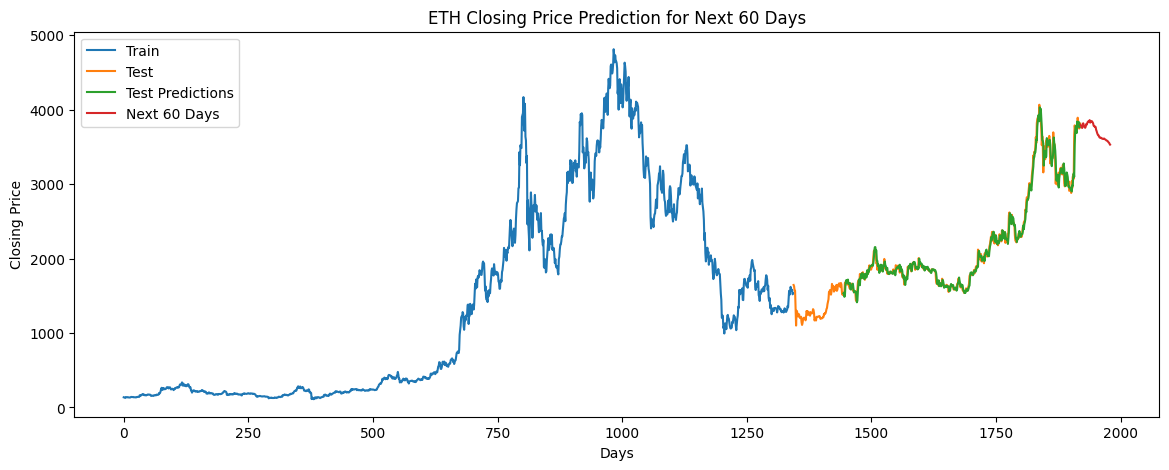

Predicted closing prices for the next 60 days:
[3795.1516 3781.9978 3767.5168 3754.1797 3772.6719 3817.5747 3794.3528
 3781.2039 3766.9124 3756.616  3770.3684 3805.273  3797.5876 3816.055
 3832.8037 3840.5845 3846.948  3839.1072 3859.9949 3826.318  3832.3577
 3840.388  3847.823  3839.5186 3830.0227 3815.1147 3785.3855 3777.7124
 3778.7402 3767.192  3766.816  3729.9688 3711.797  3688.0176 3669.89
 3656.0889 3654.836  3638.0012 3625.1758 3623.4978 3625.534  3619.4905
 3618.978  3610.5344 3608.2861 3607.6611 3610.4543 3612.333  3604.9417
 3601.0173 3597.0422 3590.608  3584.5635 3583.4712 3578.3042 3569.3098
 3560.7913 3554.8225 3540.7688 3530.7195]


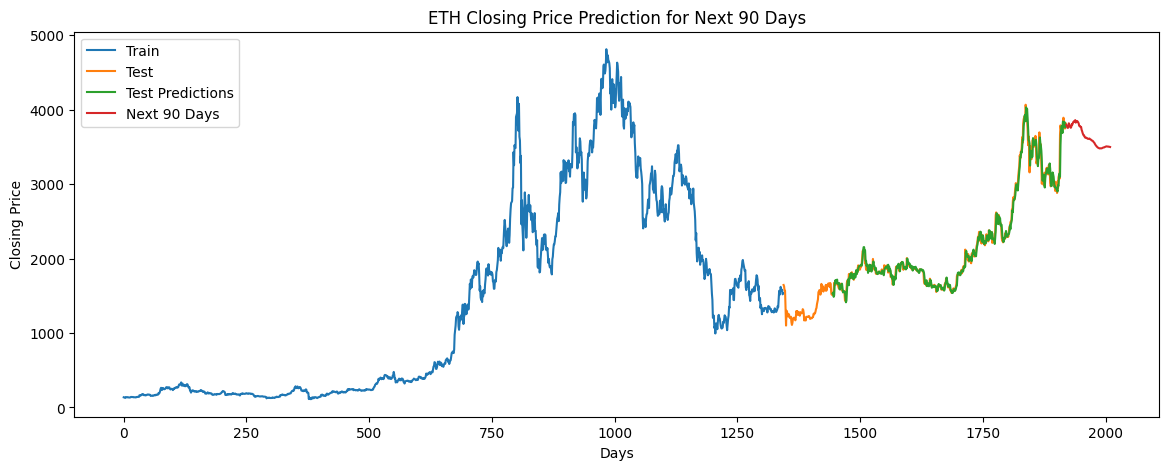

Predicted closing prices for the next 90 days:
[3795.1516 3781.9978 3767.5168 3754.1797 3772.6719 3817.5747 3794.3528
 3781.2039 3766.9124 3756.616  3770.3684 3805.273  3797.5876 3816.055
 3832.8037 3840.5845 3846.948  3839.1072 3859.9949 3826.318  3832.3577
 3840.388  3847.823  3839.5186 3830.0227 3815.1147 3785.3855 3777.7124
 3778.7402 3767.192  3766.816  3729.9688 3711.797  3688.0176 3669.89
 3656.0889 3654.836  3638.0012 3625.1758 3623.4978 3625.534  3619.4905
 3618.978  3610.5344 3608.2861 3607.6611 3610.4543 3612.333  3604.9417
 3601.0173 3597.0422 3590.608  3584.5635 3583.4712 3578.3042 3569.3098
 3560.7913 3554.8225 3540.7688 3530.7195 3518.8538 3513.65   3502.603
 3498.703  3491.19   3487.2908 3483.6765 3481.7654 3478.5554 3480.7195
 3480.8406 3480.4353 3481.0754 3484.517  3487.7666 3491.4387 3493.157
 3493.152  3497.4363 3500.4119 3503.7966 3505.95   3507.398  3505.238
 3505.076  3503.1597 3504.0383 3501.614  3500.8726 3498.9614]


In [25]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **6:4**

In [26]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv("Eth.csv")
df1 = df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797
1918,2024-05-31,3746.861572,3843.857666,3723.835205,3760.026611,3760.026611,15290700646


In [27]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [29]:
# 5. Convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 41ms/step - loss: 0.0770 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 29ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 3/100
17/17 [==============================] - 0s 29ms/step - loss: 0.0019 - val_loss: 9.4506e-04
Epoch 4/100
17/17 [==============================] - 1s 31ms/step - loss: 0.0016 - val_loss: 9.2519e-04
Epoch 5/100
17/17 [==============================] - 1s 30ms/step - loss: 0.0015 - val_loss: 9.3539e-04
Epoch 6/100
17/17 [==============================] - 1s 32ms/step - loss: 0.0014 - val_loss: 8.5246e-04
Epoch 7/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0013 - val_loss: 7.2691e-04
Epoch 8/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0012 - val_loss: 7.1135e-04
Epoch 9/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0011 - val_loss: 7.0989e-04
Epoch 10/100
17/17 [==============================] - 1s 34ms/step - los

In [34]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 7ms/step


In [35]:
# 11. Chuẩn hóa dữ liệu
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )

In [36]:
# 12. Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Testing MAPE:', test_mape)

test_mae = np.mean(np.abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 78.40774975105384
Testing MAPE: 2.921045637416465
Testing MAE: 55.44661208214246


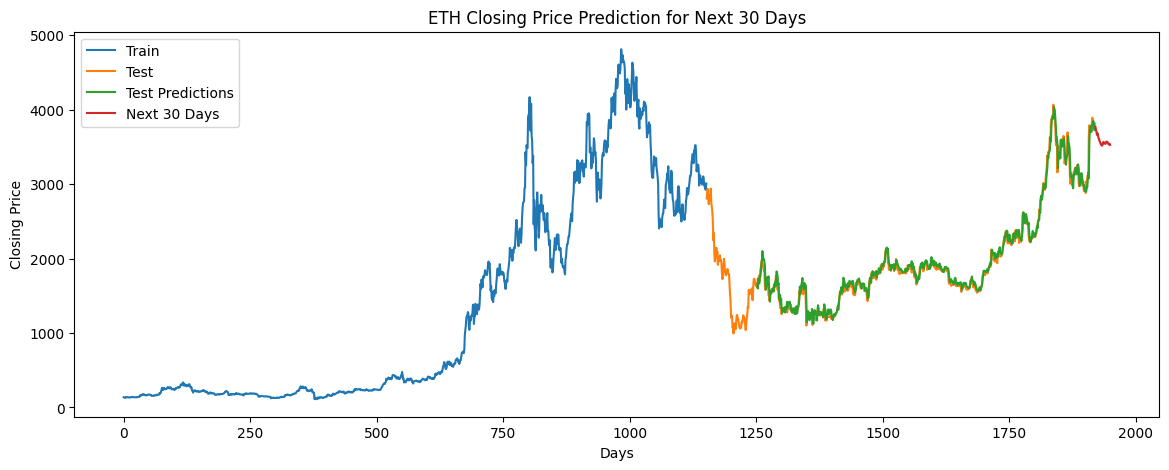

Predicted closing prices for the next 30 days:
[3770.7036 3734.0295 3702.9875 3660.6064 3684.386  3665.7417 3621.5408
 3610.2412 3578.4878 3572.922  3546.2666 3533.5415 3522.132  3516.744
 3521.9128 3556.873  3566.1785 3549.839  3554.3433 3543.5513 3540.0784
 3564.9211 3569.6326 3570.631  3560.9856 3546.3738 3534.4673 3538.2605
 3543.701  3526.4578]


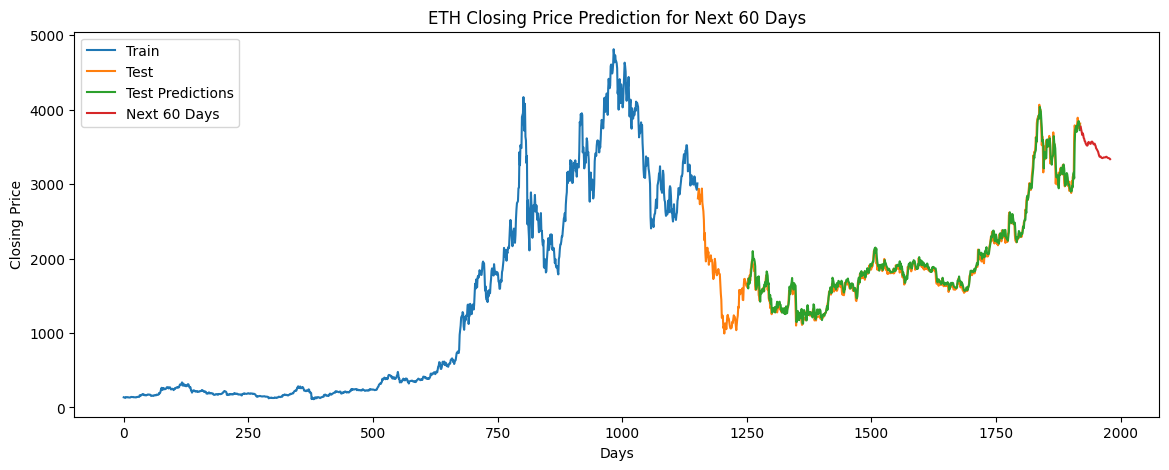

Predicted closing prices for the next 60 days:
[3770.7036 3734.0295 3702.9875 3660.6064 3684.386  3665.7417 3621.5408
 3610.2412 3578.4878 3572.922  3546.2666 3533.5415 3522.132  3516.744
 3521.9128 3556.873  3566.1785 3549.839  3554.3433 3543.5513 3540.0784
 3564.9211 3569.6326 3570.631  3560.9856 3546.3738 3534.4673 3538.2605
 3543.701  3526.4578 3511.0076 3480.3828 3472.2532 3459.4983 3447.2783
 3433.2417 3406.5693 3382.8096 3368.6094 3367.5693 3370.4202 3360.2273
 3353.6216 3350.647  3349.3545 3354.4321 3358.0776 3358.9556 3358.646
 3358.9482 3361.9995 3367.433  3366.9077 3359.3875 3354.009  3351.4888
 3349.3428 3347.0664 3343.0283 3335.58  ]


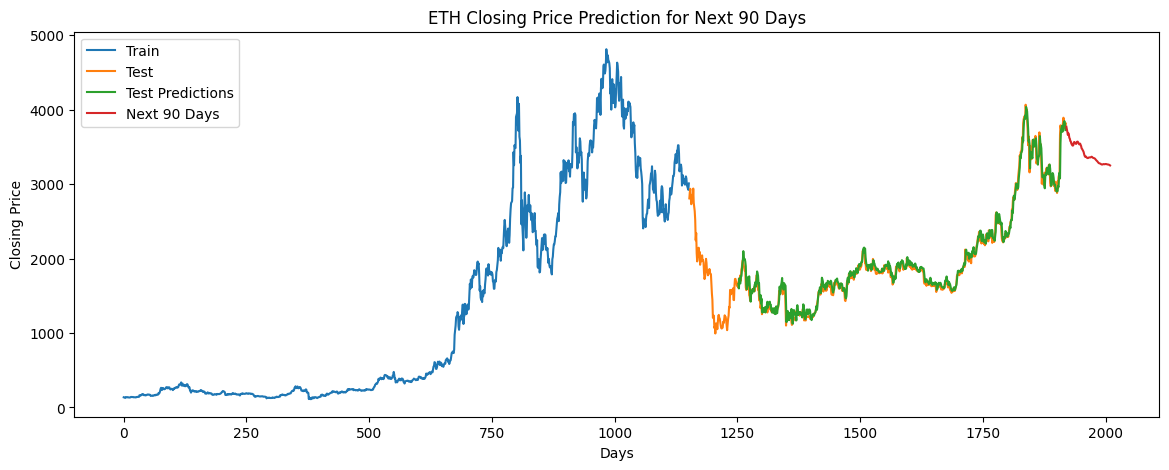

Predicted closing prices for the next 90 days:
[3770.7036 3734.0295 3702.9875 3660.6064 3684.386  3665.7417 3621.5408
 3610.2412 3578.4878 3572.922  3546.2666 3533.5415 3522.132  3516.744
 3521.9128 3556.873  3566.1785 3549.839  3554.3433 3543.5513 3540.0784
 3564.9211 3569.6326 3570.631  3560.9856 3546.3738 3534.4673 3538.2605
 3543.701  3526.4578 3511.0076 3480.3828 3472.2532 3459.4983 3447.2783
 3433.2417 3406.5693 3382.8096 3368.6094 3367.5693 3370.4202 3360.2273
 3353.6216 3350.647  3349.3545 3354.4321 3358.0776 3358.9556 3358.646
 3358.9482 3361.9995 3367.433  3366.9077 3359.3875 3354.009  3351.4888
 3349.3428 3347.0664 3343.0283 3335.58   3326.6267 3319.8645 3312.1318
 3306.948  3297.494  3289.4019 3282.2144 3279.851  3278.0066 3274.787
 3271.0662 3266.4539 3263.5964 3262.9111 3265.754  3267.6047 3269.2446
 3267.5295 3267.3591 3269.0198 3270.1301 3269.4885 3267.9495 3265.7932
 3264.1155 3263.194  3262.2705 3259.6921 3255.4597 3251.0596]


In [37]:
# 13. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[:, 0])  # Extract the values as a 1D list
    lst_output = []
    i = 0
    while(i < days):
        if(len(temp_input) > time_step):
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])  # Append the single predicted value
            lst_output.append(yhat[0][0])
            i = i + 1
    return np.array(lst_output).reshape(-1, 1)

last_100_days = df1[-time_step:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, time_step, days)
    future_predictions = scaler.inverse_transform(future_predictions)

    # Vẽ hình
    plt.figure(figsize=(14, 5))
    plt.plot(range(len(train_data)), scaler.inverse_transform(train_data), label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), scaler.inverse_transform(test_data), label='Test')
    plt.plot(range(len(train_data) + time_step, len(train_data) + time_step + len(y_pred)), y_pred, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'ETH Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())